For looking at output of relaxation code!

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = Table.read('relaxation_paczynski1991/output.txt', format='ascii')
# look at first row
row = data[0]
print(data)

N_grid = 1001
x_min = 0.8
x_max = 10.
x_grid = np.linspace(x_min, x_max, N_grid)

omega_grid = np.array([row[f'omega{ii}'] for ii in range(N_grid)])
y_grid = np.array([row[f'y{ii}'] for ii in range(N_grid)])


a_inv omega_spin  n  conv ...     y997         y998         y999       y1000   
----- ---------- --- ---- ... ------------ ------------ ------------ ----------
1e-06       0.54 1.5    1 ...  3541.939166 -7803.782207  3477.078157 918.523252
1e-06       0.54 1.5    1 ...  3541.939166 -7803.782207  3477.078157 918.523252
1e-06       0.54 1.5    1 ...  3541.939166 -7803.782207  3477.078157 918.523252
1e-06       0.54 1.5    1 ...  3541.939166 -7803.782207  3477.078157 918.523252
2e-06       0.54 1.5    1 ... -2853.985118 -1858.564944 -5859.278056 373.519144
2e-06       0.54 1.5    1 ... -2853.985118 -1858.564944 -5859.278056 373.519144
2e-06       0.54 1.5    1 ... -2853.985118 -1858.564944 -5859.278056 373.519144
2e-06       0.54 1.5    1 ... -2853.985118 -1858.564944 -5859.278056 373.519144


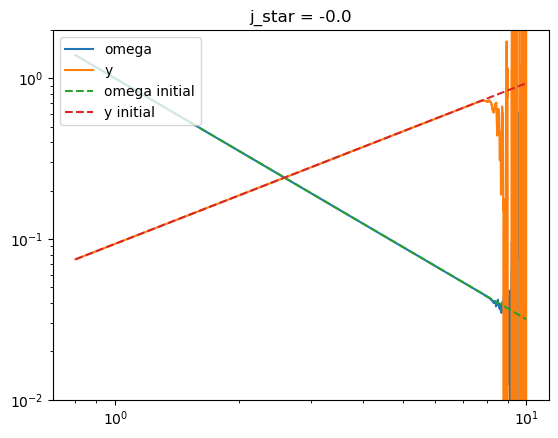

In [3]:
plt.title(f'j_star = {row["j_star"]}')

plt.plot(x_grid, omega_grid, label='omega')
plt.plot(x_grid, y_grid, label='y')
plt.ylim(0.01, 2.)

# plot initial guesses
omega_s = 0.54433105395
plt.plot(x_grid, 1 / x_grid ** 1.5, linestyle='--', label='omega initial')
plt.plot(x_grid, (1e-6 / 1.5) ** (1./(2.*1.5+3.)) * x_grid ** ((6.*1.5+3.) / (4.*1.5+6.)), linestyle='--', label='y initial')

# plt.plot(x_grid, omega_grid * x_grid ** 1.5, linestyle='--', label='omega initial')

plt.legend(loc='upper left')

plt.xscale('log')
plt.yscale('log')

plt.show()

/var/folders/dy/ssbmpgdx0gg8y3sf040xpmlw0000gn/T/ipykernel_50458/2015625240.py:6: RuntimeWarning: invalid value encountered in power
  RHS_omega = 1e-6 * x_grid ** 3 * (row["j_star"] - omega_grid ** x_grid ** 2) / y_grid ** 6


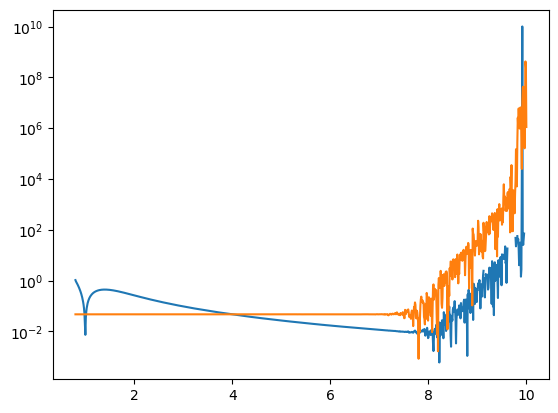

In [4]:
# Take derivatives manually and see whether constraints get violated
Deriv_y = np.gradient(y_grid, x_grid)
Deriv_omega = np.gradient(omega_grid, x_grid)

RHS_y = omega_grid ** 2 * (x_grid ** 2 + y_grid ** 2) ** 1.5 * x_grid / y_grid - x_grid / y_grid
RHS_omega = 1e-6 * x_grid ** 3 * (row["j_star"] - omega_grid ** x_grid ** 2) / y_grid ** 6

viol_y = Deriv_y - RHS_y
viol_omega = Deriv_omega - RHS_omega

plt.plot(x_grid, np.abs(viol_omega))
plt.plot(x_grid, np.abs(viol_y))
plt.yscale('log')



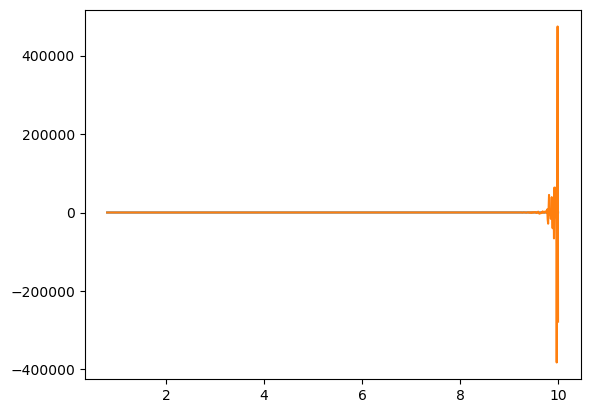

In [5]:
plt.plot(x_grid, Deriv_omega)
plt.plot(x_grid, Deriv_y)